In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of future pub"
image = pipe(prompt).images[0]  

In [2]:
from huggingface_hub import model_info

# LoRA weights ~3 MB
model_path = "D:/project/dotting_ai/data/dreambooth/spritesheet/pytorch_lora_weights.bin"

info = model_info(model_path)
model_base = info.cardData["base_model"]
print(model_base)   # CompVis/stable-diffusion-v1-4

HFValidationError: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'D:/project/dotting_ai/data/dreambooth/spritesheet/pytorch_lora_weights.bin'. Use `repo_type` argument if needed.

In [3]:
model_id = "runwayml/stable-diffusion-v1-5"
model_path = "D:/project/dotting_ai/data/dreambooth/spritesheet/pytorch_lora_weights.bin"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# load lora weights
pipe.unet.load_attn_procs(model_path, subfolder="checkpoint-2500", weight_name="pytorch_model.bin")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [17]:
prompt = "man with sword, spritesheet"
image = pipe(prompt).images[0]  

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


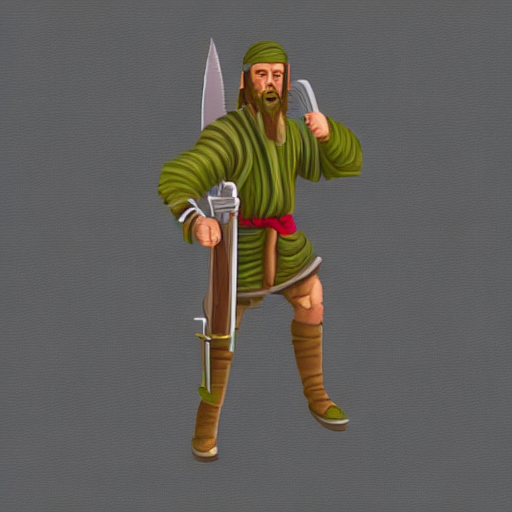

In [18]:
image